# Flow Of Project
# 1 Import Data
# 2 Proprocess Data
# 3 Visualize Data
# 4 Train test split
# 5 Train Model and Avualivation
# 6 Prediction System with Web app

# Import Necessary Packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Matplotlib is building the font cache; this may take a moment.


In [7]:
medical_df = pd.read_csv('insurance.csv')

In [8]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# About the Data:
age: age of the insured person (numeric)                                          
sex: gender of the insured person (categorical: male/female)                                     
bmi: body mass index of the insured person (numeric)                                               
children: number of children covered by the insurance plan (numeric)                                  
smoker: whether or not the insured person is a smoker (categorical: yes/no)                                  
region: region where the insured person resides (categorical: northeast/northwest/southeast/southwest)                                            
charges: the insurance charges/costs billed to the insured person (numeric)                                                         

# Exploring Data & Analysing Data

In [9]:
medical_df.shape

(1338, 7)

In [10]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Visualisation

<Figure size 300x300 with 0 Axes>

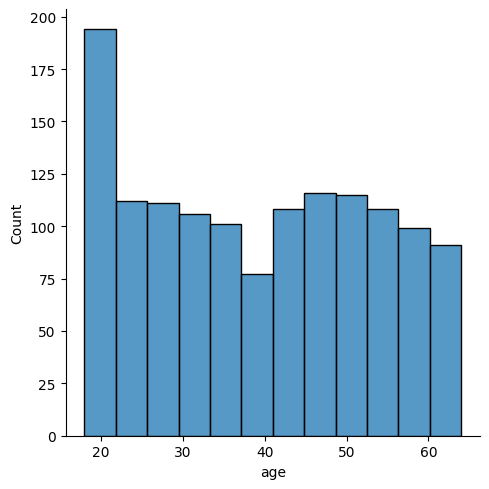

In [12]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='age')

<Figure size 300x300 with 0 Axes>

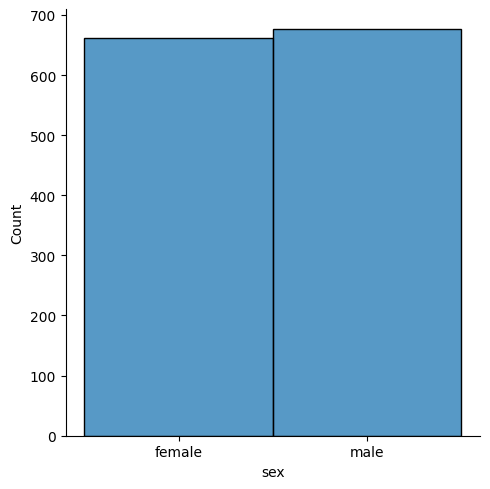

In [13]:
plt.figure(figsize=(3,3))
sns.displot(data=medical_df,x='sex',kind='hist')

In [14]:
medical_df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [15]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 400x400 with 0 Axes>

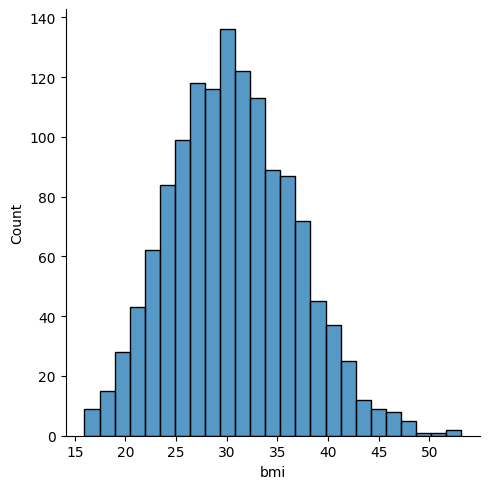

In [16]:
plt.figure(figsize=(4,4))
sns.displot(data=medical_df,x='bmi')
plt.show()

In [17]:
medical_df['bmi'].value_counts()

bmi
32.300    13
28.310     9
31.350     8
28.880     8
30.875     8
          ..
21.500     1
39.710     1
32.870     1
44.700     1
30.970     1
Name: count, Length: 548, dtype: int64

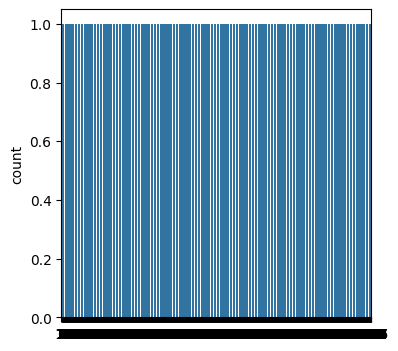

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(medical_df['children'])
plt.show()

In [19]:
medical_df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

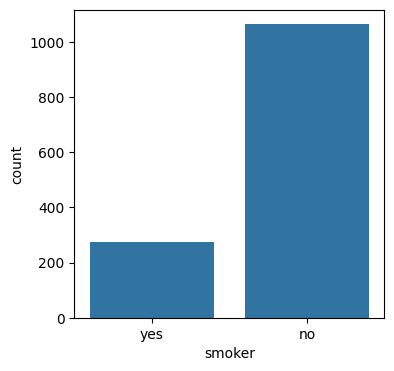

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(data=medical_df,x='smoker')
plt.show()

In [21]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# convert categorical column to numerical

In [22]:
medical_df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [23]:
medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
medical_df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

C:\Users\Ankit Saini\AppData\Local\Temp\ipykernel_17112\2412326914.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\Ankit Saini\AppData\Local\Temp\ipykernel_17112\2412326914.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medical_df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\Ankit Saini\AppData\Local\Temp\ipykernel_17112\2412326914.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versio

In [24]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


# Train Test Split

In [25]:
X = medical_df.drop('charges',axis=1)
y = medical_df['charges']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [27]:
X_train.shape

(1204, 6)

In [28]:
X_test.shape

(134, 6)

In [29]:
lg = LinearRegression()
lg.fit(X_train,y_train) # 80 model will be train
y_pred = lg.predict(X_test) # 10 model will be predicted

In [30]:
r2_score(y_test,y_pred)

0.7064951721664847

# Prediction System

In [31]:
input_df = (33,0,22.705,0,1,2)
np_df = np.asarray(input_df)
input_df_reshaped = np_df.reshape(1,-1)
prediction = lg.predict(input_df_reshaped)
print("Medical Insurance Is :",prediction)

Medical Insurance Is : [3514.11729902]


c:\Users\Ankit Saini\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
